# Chapter 11
## Metrics for model evaluations and comparisons
This notebook is a companion to the book _XGBoost for Regression Predictive Modeling and Time Series Analysis_.
This chapter examines differnet metrics for evaluating model performance.

In [1]:
# ----------------------------------------
# filename metricsformodeleval.ipynb
# purpose use metrics to evaluate model
# performance
# author Joyce Weiner
# revision 1.1
# revision history 1.0 - initial script
# 1.1 - compared XGBoost with the scikit-learn API
#       to the native Python API
# ----------------------------------------

## Comparing the scikit-learn and Python APIs for XGBoost

In [2]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# load the dataset and split the data
housingX, housingy = fetch_california_housing (return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(housingX,housingy, test_size=0.2, random_state=17)

### Use scikit-learn API for XGBoost to train a model and make a prediction

In [3]:
sklearn_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100)

# Train the model
sklearn_model.fit(X_train, y_train)

# Make predictions
sklearn_preds = sklearn_model.predict(X_test)

### Use the native Python API in XGBoost to train a model and make a prediction


In [4]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [5]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

In [6]:
xgbapi_model = xgb.train(params, dtrain, num_boost_round=100)

In [7]:
xgbapi_preds = xgbapi_model.predict(dtest)

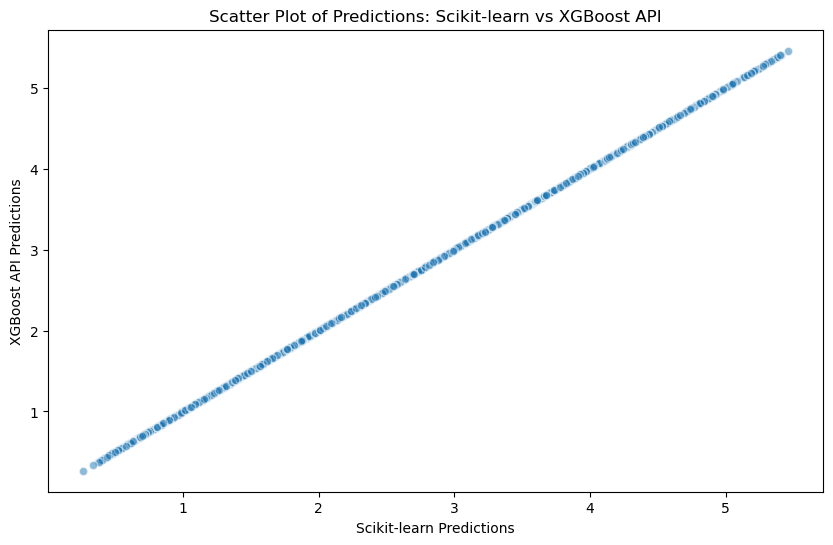

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(sklearn_preds, xgbapi_preds,  alpha=0.5, edgecolors='white')
plt.xlabel('Scikit-learn Predictions')
plt.ylabel('XGBoost API Predictions')
plt.title('Scatter Plot of Predictions: Scikit-learn vs XGBoost API')
plt.show()

## Binary classifier metrics: precision, recall, and F1 score  

In [9]:
y_pred = [0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1] 
y_true = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

### Calculate accuracy

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print ("Accuracy = ", accuracy)

Accuracy =  0.8


### Calculate precision and recall

In [11]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print ("Precision = ", precision)
print ("Recall = ", recall)

Precision =  0.75
Recall =  0.9


### Calculate F<sub>1</sub> score

In [12]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)

print(f"F1 Score = {f1:.3f}")

F1 Score = 0.818


### Calculate accuracy, precision, recall, and F1 score for a model with imbalanced data (few defects): 

In [13]:
y_true_imbalanced = [0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
y_pred_imbalanced = [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
accuracy_no_defect = accuracy_score(y_true_imbalanced, y_pred_imbalanced)
precision_no_defect = precision_score(y_true_imbalanced, y_pred_imbalanced)
recall_no_defect = recall_score(y_true_imbalanced, y_pred_imbalanced)
f1_no_defect = f1_score(y_true_imbalanced, y_pred_imbalanced)

print ("Accuracy, precision, recall, F1 score for an imbalanced classifier")
print (f"Accuracy = {accuracy_no_defect:.3f}")
print (f"Precision = {precision_no_defect:.3f}")
print (f"Recall = {recall_no_defect:.3f}")
print (f"F1 Score = {f1_no_defect:.3f}")

Accuracy, precision, recall, F1 score for an imbalanced classifier
Accuracy = 0.950
Precision = 1.000
Recall = 0.500
F1 Score = 0.667


### Calculate accuracy, precision, recall, and F1 score for a model with imbalanced data (mostly defects): 

In [14]:
y_true_defects = [1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y_pred_defects = [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
accuracy_defects = accuracy_score(y_true_defects, y_pred_defects)
precision_defects = precision_score(y_true_defects, y_pred_defects)
recall_defects = recall_score(y_true_defects, y_pred_defects)
f1_defects = f1_score(y_true_defects, y_pred_defects)

print ("Accuracy, precision, recall, F1 score for an imbalanced classifier")
print (f"Accuracy = {accuracy_defects:.3f}")
print (f"Precision = {precision_defects:.3f}")
print (f"Recall = {recall_defects:.3f}")
print (f"F1 Score = {f1_defects:.3f}")


Accuracy, precision, recall, F1 score for an imbalanced classifier
Accuracy = 0.950
Precision = 0.947
Recall = 1.000
F1 Score = 0.973


## Graphical analysis of binary classification ROC-AUC curves and confusion matrix 

### ROC-AUC Curve

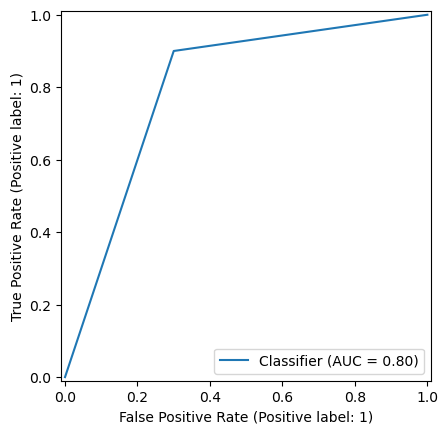

In [15]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

### Confusion matrix

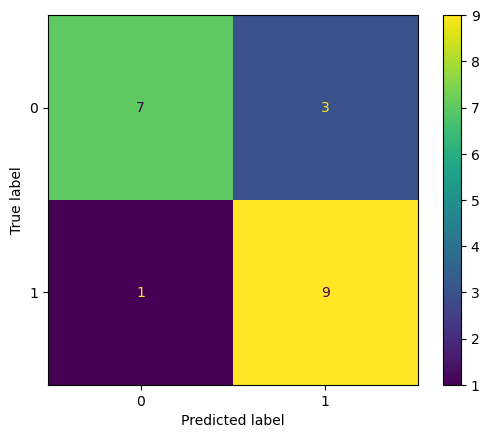

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

## Multi-class classifier metrics: Micro and Macro Averages 

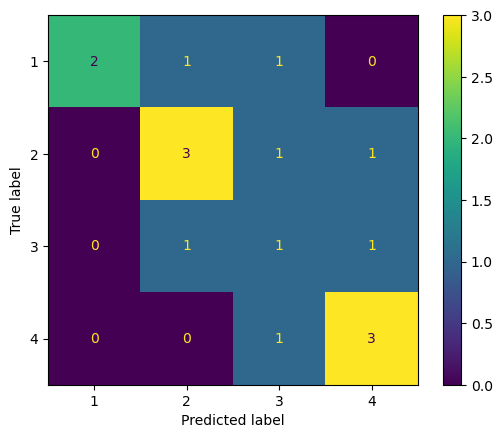

In [17]:
# Grading tomatoes example

grades = ["Excellent", "Good", "Fair","Poor"]
y_true_tomatoes = [1,1,1,1,2,2,2,2,2,3,3,3,4,4,4,4]
y_pred_tomatoes = [2,1,3,1,2,2,2,3,4,3,4,2,4,4,3,4]

ConfusionMatrixDisplay.from_predictions(y_true_tomatoes, y_pred_tomatoes)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_true_tomatoes, y_pred_tomatoes,target_names=grades))

              precision    recall  f1-score   support

   Excellent       1.00      0.50      0.67         4
        Good       0.60      0.60      0.60         5
        Fair       0.25      0.33      0.29         3
        Poor       0.60      0.75      0.67         4

    accuracy                           0.56        16
   macro avg       0.61      0.55      0.55        16
weighted avg       0.63      0.56      0.57        16



### Measure the time it takes for execution of a block of code

In [19]:
import time
start_time = time.perf_counter()

# replace this for loop with what you want to measure
for i in range(10):
    print(i)

end_time = time.perf_counter()

elapsed_time = end_time - start_time
print (f"The code executed in {elapsed_time:.5f} seconds")

0
1
2
3
4
5
6
7
8
9
The code executed in 0.00071 seconds
